In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from scipy import stats

In [2]:
zip_file_path = 'preprocessed.csv.zip'
csv_file_name = 'preprocessed_data.csv'

# Read the CSV file from the zip archive
with zipfile.ZipFile(zip_file_path) as z:
    with z.open(csv_file_name) as f:
        df_cleaned = pd.read_csv(f, parse_dates=['pickup_datetime'])

In [3]:
df = df_cleaned
df

key  fare_amount  \
0           2009-06-15 17:26:21.0000001          4.5   
1           2012-04-21 04:30:42.0000001          7.7   
2         2010-03-09 07:51:00.000000135          5.3   
3           2012-11-20 20:35:00.0000001          7.5   
4         2012-12-03 13:10:00.000000125          9.0   
...                                 ...          ...   
44799566  2012-08-28 16:32:00.000000140         10.9   
44799567  2012-05-29 17:03:00.000000175         14.9   
44799568    2015-02-19 00:32:56.0000002         17.0   
44799569  2011-10-13 22:54:00.000000192         10.9   
44799570  2012-07-15 14:33:00.000000193          9.3   

                   pickup_datetime  pickup_longitude  pickup_latitude  \
0        2009-06-15 17:26:21+00:00        -73.844311        40.721319   
1        2012-04-21 04:30:42+00:00        -73.987130        40.733143   
2        2010-03-09 07:51:00+00:00        -73.968095        40.768008   
3        2012-11-20 20:35:00+00:00        -73.980002        40.751662   
4        2012-12-03 13:10:00+00:00        -74.006462        40.726713   
...                            ...               ...              ...   
44799566 2012-08-28 16:32:00+00:00        -73.981787        40.779525   
44799567 2012-05-29 17:03:00+00:00        -73.996188        40.725842   
44799568 2015-02-19 00:32:56+00:00        -73.982857        40.744808   
44799569 2011-10-13 22:54:00+00:00        -73.992933        40.723102   
44799570 2012-07-15 14:33:00+00:00        -73.989310        40.720417   

          dropoff_longitude  dropoff_latitude  passenger_count  \
0                -73.841610         40.712278                1   
1                -73.991567         40.758092                1   
2                -73.956655         40.783762                1   
3                -73.973802         40.764842                1   
4                -73.993078         40.731628                1   
...                     ...               ...              ...   
44799566         -73.976405         40.751000                6   
44799567         -73.946020         40.700277                6   
44799568         -73.915627         40.759079                6   
44799569         -73.963425         40.757462                6   
44799570         -73.989437         40.748022                6   

          trip_distance_km  pickup_year  pickup_month  pickup_day  \
0                 1.030764         2009             6          15   
1                 2.799270         2012             4          21   
2                 1.999157         2010             3           9   
3                 1.555807         2012            11          20   
4                 1.253232         2012            12           3   
...                    ...          ...           ...         ...   
44799566          3.204058         2012             8          28   
44799567          5.095098         2012             5          29   
44799568          5.881252         2015             2          19   
44799569          4.558269         2011            10          13   
44799570          3.069555         2012             7          15   

         pickup_dayofweek  pickup_hour  is_weekend  fare_per_km distance_band  
0                  Monday           17           0     4.365694         short  
1                Saturday            4           1     2.750717         short  
2                 Tuesday            7           0     2.651118         short  
3                 Tuesday           20           0     4.820650         short  
4                  Monday           13           0     7.181434         short  
...                   ...          ...         ...          ...           ...  
44799566          Tuesday           16           0     3.401936        medium  
44799567          Tuesday           17           0     2.924379        medium  
44799568         Thursday            0           0     2.890541        medium  
44799569         Thursday           22           0     2.391258 

In [4]:
column_types = df.dtypes
for column, dtype in column_types.items():
    print(f"{column}: {dtype}")
numeric_df = df.select_dtypes(include='number')


mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode().iloc[0]
std_dev_values = numeric_df.std()
min_values = numeric_df.min()
max_values = numeric_df.max()
quartiles = numeric_df.quantile([0.25, 0.5, 0.75])

print("\nMean:")
print(mean_values)
print("\nMedian:")
print(median_values)
print("\nMode:")
print(mode_values)
print("\nStandard Deviation:")
print(std_dev_values)
print("\nMin:")
print(min_values)
print("\nMax:")
print(max_values)
print("\nQuartiles:")
print(quartiles)

key: object
fare_amount: float64
pickup_datetime: datetime64[ns, UTC]
pickup_longitude: float64
pickup_latitude: float64
dropoff_longitude: float64
dropoff_latitude: float64
passenger_count: int64
trip_distance_km: float64
pickup_year: int64
pickup_month: int64
pickup_day: int64
pickup_dayofweek: object
pickup_hour: int64
is_weekend: int64
fare_per_km: float64
distance_band: object

Mean:
fare_amount             8.743927
pickup_longitude      -73.940202
pickup_latitude        40.712282
dropoff_longitude     -73.938628
dropoff_latitude       40.712500
passenger_count         1.686167
trip_distance_km        2.508261
pickup_year          2011.681071
pickup_month            6.232923
pickup_day             15.710825
pickup_hour            13.586355
is_weekend              0.286242
fare_per_km             4.096135
dtype: float64

Median:
fare_amount             8.000000
pickup_longitude      -73.982552
pickup_latitude        40.753207
dropoff_longitude     -73.981467
dropoff_latitude       

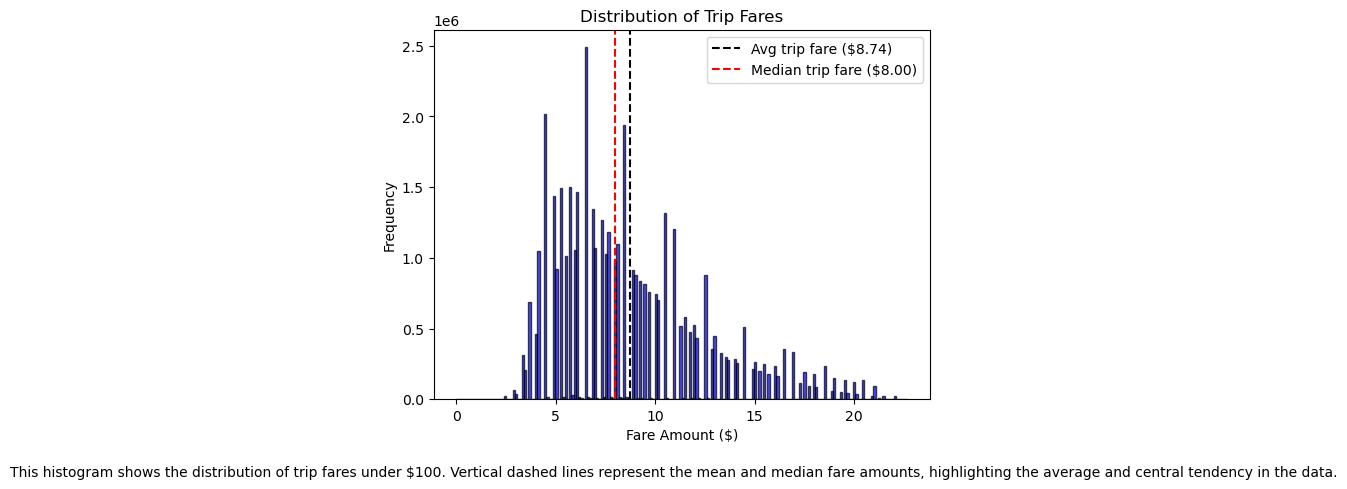

In [5]:
plt.hist(df[df.fare_amount < 100]["fare_amount"], bins=200, color='blue', edgecolor='black', alpha=0.7)

mean_fare = df["fare_amount"].mean()
median_fare = df["fare_amount"].median()

plt.axvline(mean_fare, color="k", linestyle="dashed", label=f"Avg trip fare (${mean_fare:.2f})")
plt.axvline(median_fare, color="r", linestyle="dashed", label=f"Median trip fare (${median_fare:.2f})")

plt.legend()
plt.title("Distribution of Trip Fares")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.figtext(0.5, -0.05, "This histogram shows the distribution of trip fares under $100. Vertical dashed lines represent the mean and median fare amounts, highlighting the average and central tendency in the data.", ha="center", fontsize=10)
plt.show()


The following conclusions can be drawn from this histogram:



1.   Distribution Shape: The distribution of trip fares is right-skewed,indicating that most trips have lower fares, but there are fewer trips with higher fares.
2.   Average and Median Comparison:

*   The mean trip fare is around $8.69, marked by the black dashed line.

*   The median trip fare is around $8.00, marked by the red dashed line.



*   The proximity of the mean and median indicates that while the distribution is skewed, it is not heavily skewed. The mean is slightly higher than the median, suggesting the presence of some higher fare outliers that pull the mean to the right.

3. Frequency of Fares: The highest frequency of trips falls within the range of 5 to 10, indicating that most trips tend to have fares within this range.

4. Outliers: There are fewer trips with fares beyond $15, and the frequency diminishes significantly for higher fare amounts, showing that higher fares are rare compared to the lower range.

Overall, this analysis shows that while most trips are relatively affordable, there are some higher fare amounts that slightly skew the average upward.








In [6]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
year_col = df['pickup_datetime'].dt.year.to_frame()
year_col = year_col.rename(columns={"pickup_datetime": "Year"})
year_df = year_col.join(df["passenger_count"]).join(df["fare_amount"]).groupby('Year').sum().reset_index()

print("\nYearly aggregated data:")
print(year_df)



Yearly aggregated data:
   Year  passenger_count  fare_amount
0  2009         12212549  58911244.98
1  2010         11568779  56115000.14
2  2011         12095668  60303926.22
3  2012         12196313  62692490.54
4  2013         11649713  64721054.73
5  2014         10815399  60782715.12
6  2015          5001152  28197747.25


The yearly data shows:



*   Peak Years: 2011 had the highest passenger count,while 2013 had the highest fare amount.
*   Decline: Both metrics declined after 2013, with a significant drop in 2015.

*  2015 Insight: The sharp decline in 2015 suggests possible data collection issues, reduced taxi use, or competition from ride-sharing services.

Overall, passenger counts and fare amounts rose until 2013, then declined, especially in 2015.








In [7]:
df['pickup_dayofweek'] = df['pickup_datetime'].dt.day_name()
day_df = df.groupby('pickup_dayofweek')[['passenger_count', 'fare_amount']].sum().reset_index()
day_df



pickup_dayofweek  passenger_count  fare_amount
0           Friday         11559513  60487593.33
1           Monday          9430342  48764117.93
2         Saturday         12374166  61630945.14
3           Sunday         10324091  51313069.59
4         Thursday         10964098  58513519.21
5          Tuesday         10291429  54497043.10
6        Wednesday         10595934  56517890.68

The table of aggregated data by day of the week reveals:


*   Highest Passenger Count and Fare: Saturday had the highest passenger count (218,504) and total fare amount ($1,085,569.51), indicating that weekends are popular for taxi use.
*   Weekend vs. Weekday: Both passenger counts and fare amounts are generally higher on weekends (Friday to Sunday) compared to weekdays.

*  Lowest Metrics: Monday had the lowest passenger count (165,593) and fare amount ($858,997.00), suggesting reduced taxi usage at the start of the week.

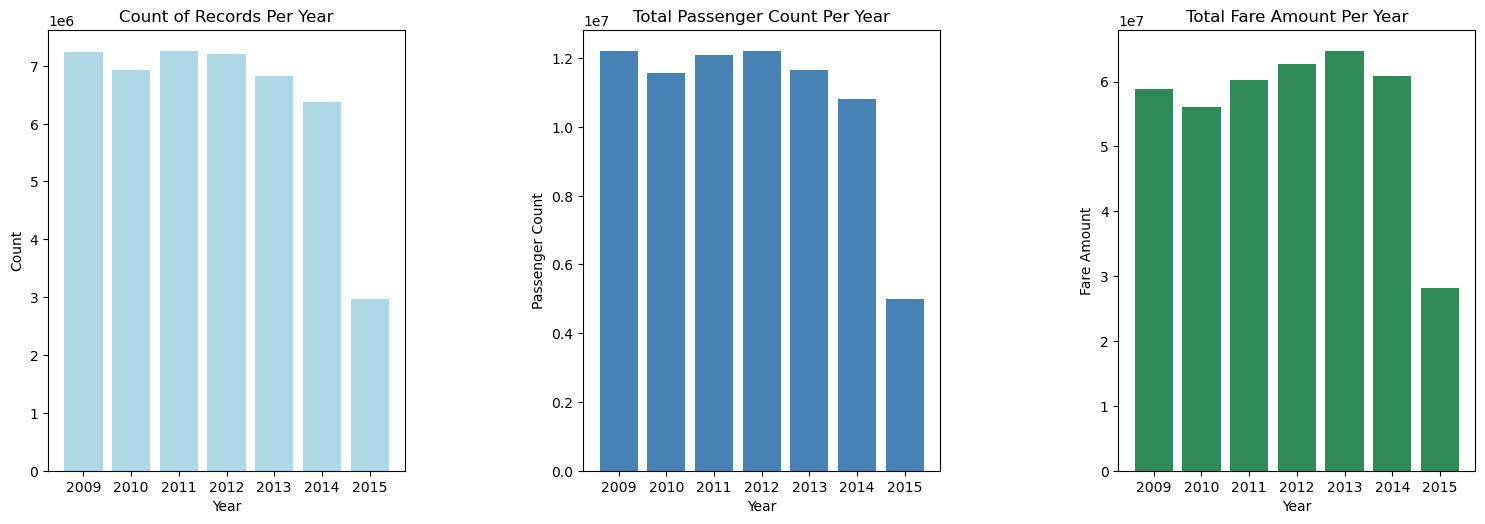


The visualizations illustrate the following:
1. The first plot shows the count of records per year, indicating data distribution over the years.
2. The second plot displays the total number of passengers per year, reflecting travel volume.
3. The third plot shows the total fare amount collected per year, indicating revenue trends.


In [8]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_year'] = df['pickup_datetime'].dt.year

year_counts = df['pickup_year'].value_counts().sort_index()
year_df = df.groupby('pickup_year').agg({'passenger_count': 'sum', 'fare_amount': 'sum'}).reset_index()
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
fig.tight_layout()
plt.subplots_adjust(wspace=0.5)

axs[0].bar(year_counts.index.astype(int), year_counts.values, color='lightblue')
axs[0].set_title("Count of Records Per Year")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Count")

axs[1].bar(year_df['pickup_year'], year_df['passenger_count'], color='steelblue')
axs[1].set_title("Total Passenger Count Per Year")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Passenger Count")

axs[2].bar(year_df['pickup_year'], year_df['fare_amount'], color='seagreen')
axs[2].set_title("Total Fare Amount Per Year")
axs[2].set_xlabel("Year")
axs[2].set_ylabel("Fare Amount")

plt.show()
print("\nThe visualizations illustrate the following:")
print("1. The first plot shows the count of records per year, indicating data distribution over the years.")
print("2. The second plot displays the total number of passengers per year, reflecting travel volume.")
print("3. The third plot shows the total fare amount collected per year, indicating revenue trends.")


From the three bar charts presented, we can draw the following conclusions:

1. Count of Records Per Year : The number of trip records remains fairly consistent from 2009 to 2014, with a slight decrease over time.
A significant drop is observed in 2015, indicating either a substantial reduction in data collection, fewer trips recorded, or incomplete data for that year.

2. Total Passenger Count Per Year : The total passenger count shows a similar trend to the count of records, maintaining a relatively steady level from 2009 to 2014.
There is a notable decline in 2015, mirroring the pattern seen in the record count, which suggests a consistent reduction in recorded data or passenger activity.

3. Total Fare Amount Per Year : The total fare amount per year is relatively stable from 2009 to 2014, with minor fluctuations. The highest total fare amounts are seen around 2012 to 2013.
There is a sharp decrease in 2015, similar to the other two charts, reinforcing the idea of reduced data or trip activity for that year.

Overall Conclusion:
The data suggests that from 2009 to 2014, trip activity, passenger count, and total fare amounts remained relatively consistent, with some variation. However, 2015 shows a noticeable decline across all metrics, possibly indicating data issues, reduced trips, or incomplete data for that year.







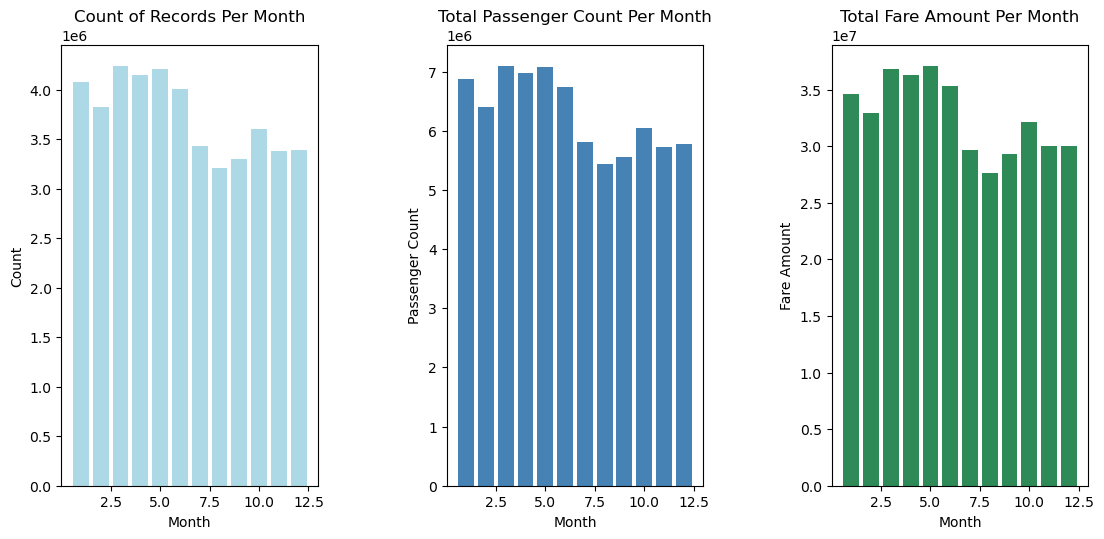


The visualizations illustrate the following:
1. The first plot shows the count of records per month, indicating data distribution over months.
2. The second plot displays the total number of passengers per month, reflecting travel volume.
3. The third plot shows the total fare amount collected per month, indicating revenue trends.


In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_month'] = df['pickup_datetime'].dt.month

month_counts = df['pickup_month'].value_counts().sort_index()
month_df = df.groupby('pickup_month').agg({'passenger_count': 'sum', 'fare_amount': 'sum'}).reset_index()
month_df.rename(columns={'pickup_month': 'Month'}, inplace=True)
fig, axs = plt.subplots(ncols=3, figsize=(11, 5))
fig.tight_layout()
plt.subplots_adjust(wspace=0.5)

axs[0].bar(month_counts.index, month_counts.values, color='lightblue')
axs[0].set_title("Count of Records Per Month")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Count")

axs[1].bar(month_df['Month'], month_df['passenger_count'], color='steelblue')
axs[1].set_title("Total Passenger Count Per Month")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Passenger Count")

axs[2].bar(month_df['Month'], month_df['fare_amount'], color='seagreen')
axs[2].set_title("Total Fare Amount Per Month")
axs[2].set_xlabel("Month")
axs[2].set_ylabel("Fare Amount")

plt.show()
print("\nThe visualizations illustrate the following:")
print("1. The first plot shows the count of records per month, indicating data distribution over months.")
print("2. The second plot displays the total number of passengers per month, reflecting travel volume.")
print("3. The third plot shows the total fare amount collected per month, indicating revenue trends.")

From the three bar charts showing monthly trends, the following insights can be concluded:

1. Count of Records Per Month : The number of trip records is relatively consistent across the months, with slight variations.
The highest counts are observed around March to June, indicating higher trip activity during these months.
There is a slight decrease in trip records towards the later months, especially around August and September.

2. Total Passenger Count Per Month : Passenger counts follow a similar pattern to the count of records, with high values from February to May.
There is a visible dip in the middle months, particularly around July and August, which might suggest a seasonal or holiday effect on travel.

3. Total Fare Amount Per Month : The total fare amount per month shows a steady trend, with peak fare amounts around March to May.
A drop is noticeable in the summer months (June to August), suggesting reduced fare collections, potentially due to fewer trips or lower average fares during these months.
Fares pick up again in September and remain steady until the end of the year.

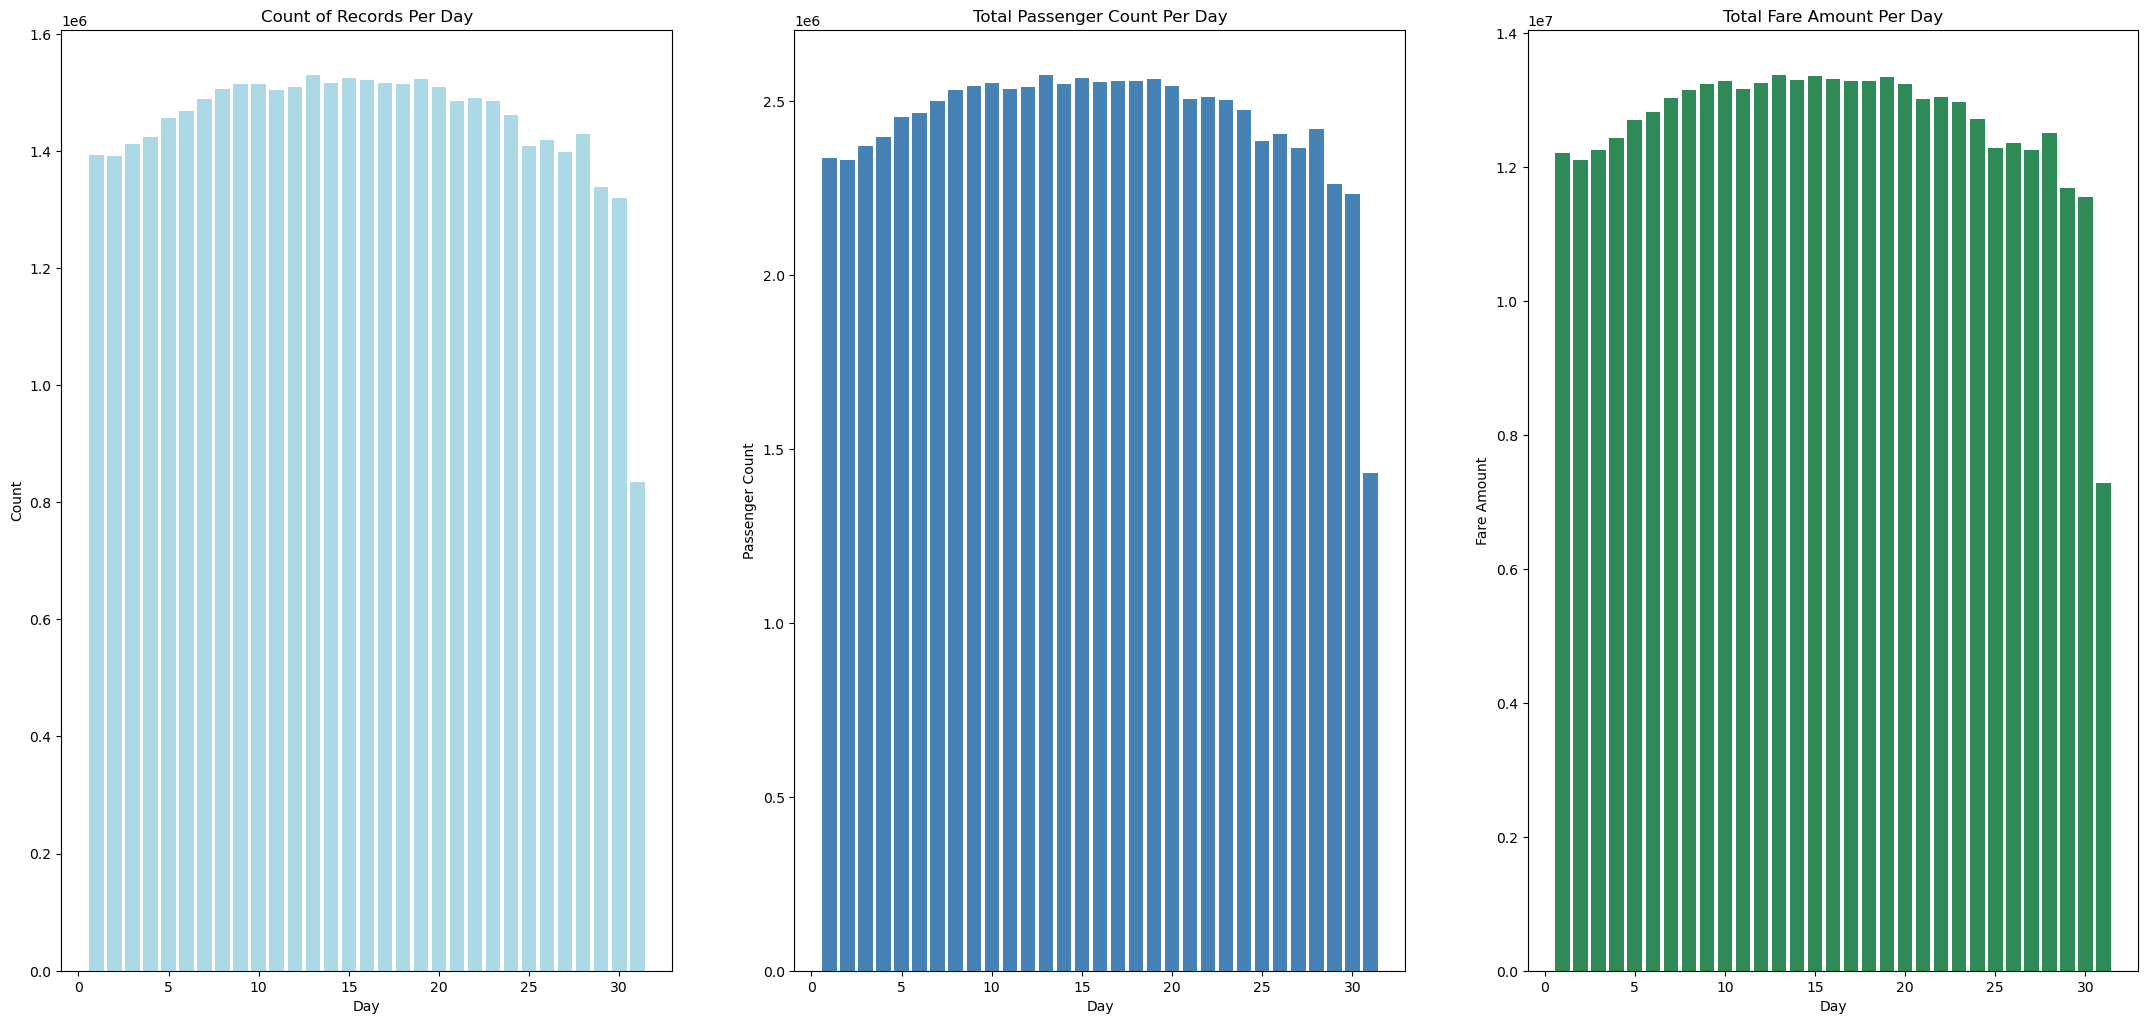


The visualizations illustrate the following:
1. The first plot shows the count of records per day, indicating data distribution over days.
2. The second plot displays the total number of passengers per day, reflecting travel volume.
3. The third plot shows the total fare amount collected per day, indicating revenue trends.


In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_day'] = df['pickup_datetime'].dt.day

day_counts = df['pickup_day'].value_counts().sort_index()
day_df = df.groupby('pickup_day').agg({'passenger_count': 'sum', 'fare_amount': 'sum'}).reset_index()
day_df.rename(columns={'pickup_day': 'Day'}, inplace=True)
fig, axs = plt.subplots(ncols=3, figsize=(21.5, 10))
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

axs[0].bar(day_counts.index, day_counts.values, color='lightblue')
axs[0].set_title("Count of Records Per Day")
axs[0].set_xlabel("Day")
axs[0].set_ylabel("Count")

axs[1].bar(day_df['Day'], day_df['passenger_count'], color='steelblue')
axs[1].set_title("Total Passenger Count Per Day")
axs[1].set_xlabel("Day")
axs[1].set_ylabel("Passenger Count")

axs[2].bar(day_df['Day'], day_df['fare_amount'], color='seagreen')
axs[2].set_title("Total Fare Amount Per Day")
axs[2].set_xlabel("Day")
axs[2].set_ylabel("Fare Amount")

plt.show()
print("\nThe visualizations illustrate the following:")
print("1. The first plot shows the count of records per day, indicating data distribution over days.")
print("2. The second plot displays the total number of passengers per day, reflecting travel volume.")
print("3. The third plot shows the total fare amount collected per day, indicating revenue trends.")

From the bar charts showing daily trends, here are the observations:

1. Count of Records Per Day : The count of trip records per day is relatively uniform from the beginning to the mid-month, peaking around the middle days.
A gradual decline is observed as the month progresses towards the end, with a noticeable drop in trip counts on the last day.

2. Total Passenger Count Per Day : The total passenger count per day shows a similar pattern to the count of records, indicating consistent passenger activity throughout most of the month.
Like the record count, there is a decline in passenger count towards the end of the month, suggesting a potential decrease in trip activity.

3. Total Fare Amount Per Day : The total fare amount follows the same trend, remaining steady during the early and middle parts of the month and then declining towards the end.
The highest total fare amounts appear during the mid-month, aligning with the peak in passenger count and record count.

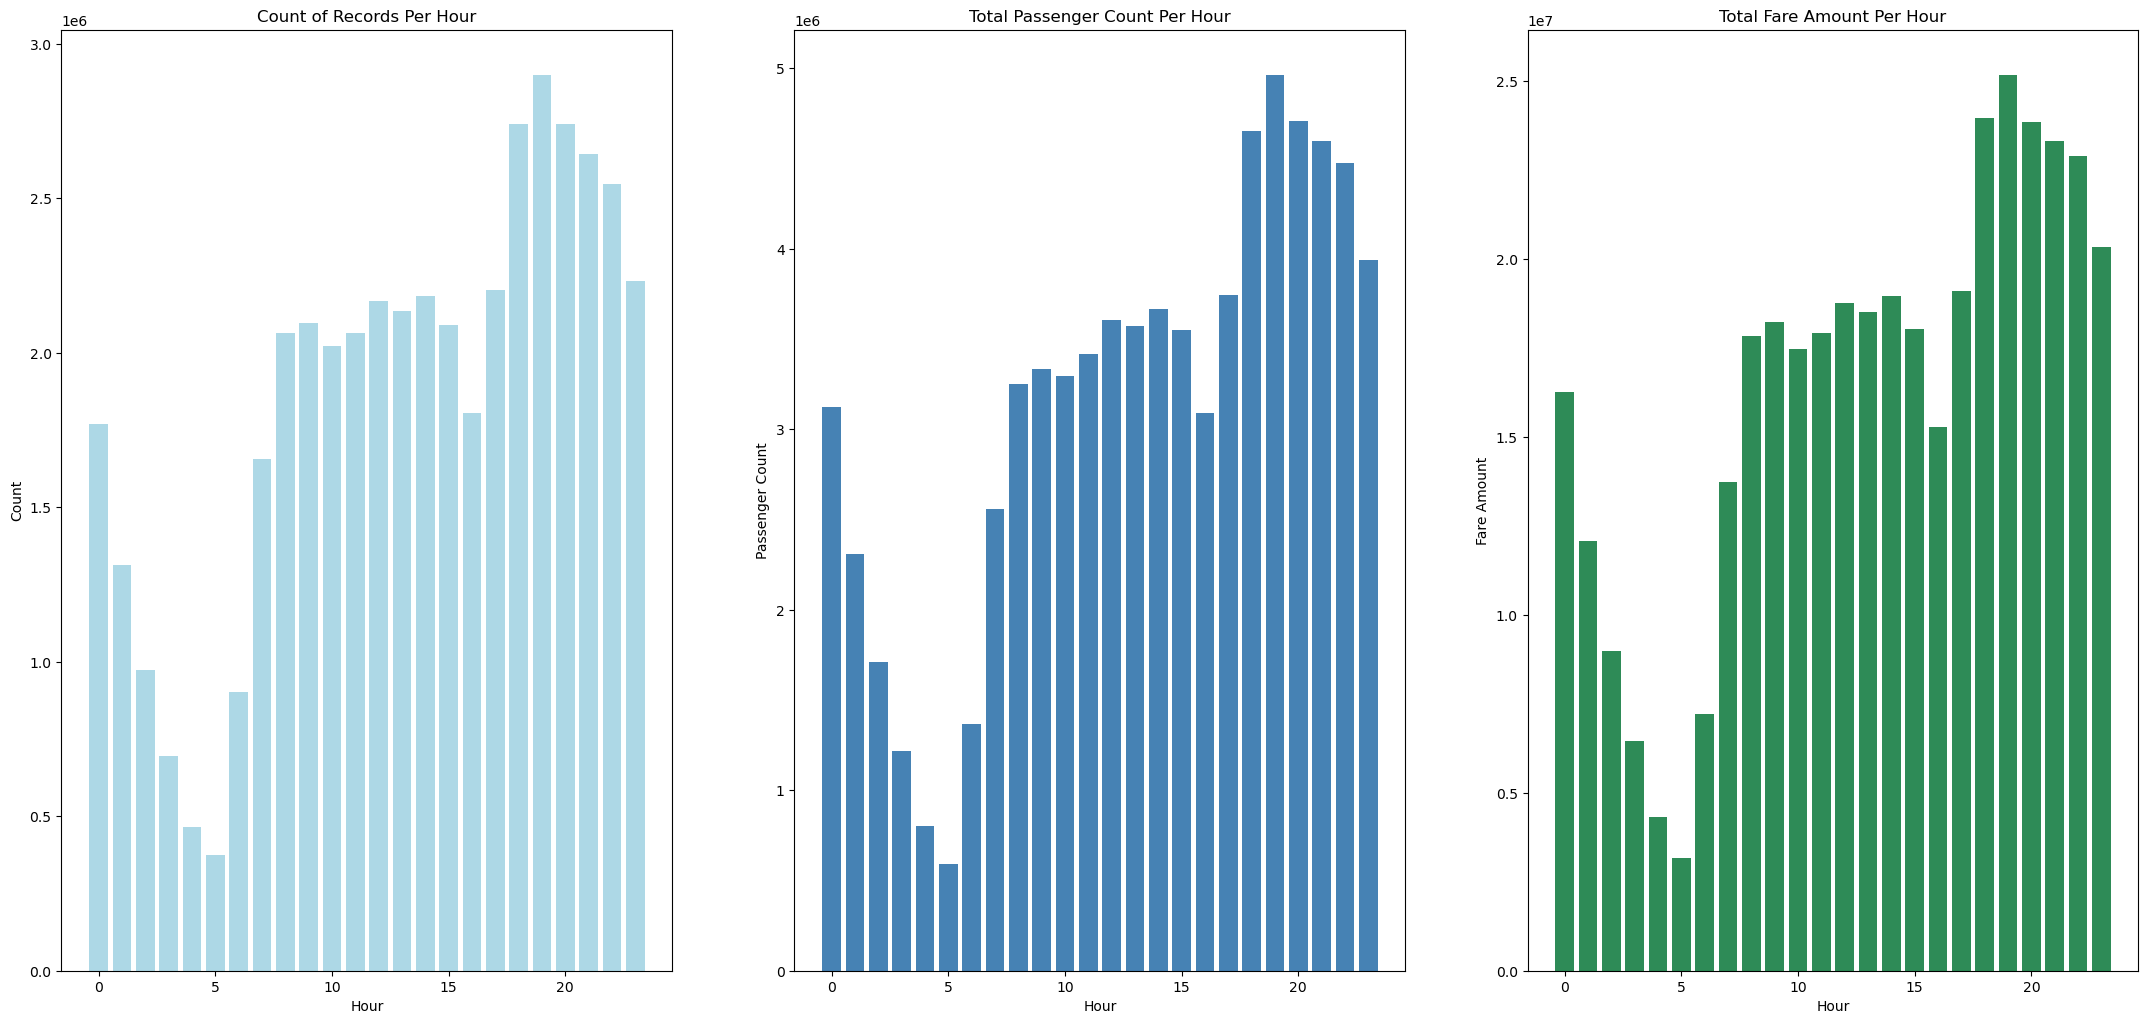


The visualizations illustrate the following:
1. The first plot shows the count of records per hour, indicating data distribution over hours.
2. The second plot displays the total number of passengers per hour, reflecting travel volume.
3. The third plot shows the total fare amount collected per hour, indicating revenue trends.


In [11]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour

hour_counts = df['pickup_hour'].value_counts().sort_index()
hour_df = df.groupby('pickup_hour').agg({'passenger_count': 'sum', 'fare_amount': 'sum'}).reset_index()
hour_df.rename(columns={'pickup_hour': 'Hour'}, inplace=True)
fig, axs = plt.subplots(ncols=3, figsize=(21.5, 10))
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

axs[0].bar(hour_counts.index, hour_counts.values, color='lightblue')
axs[0].set_title("Count of Records Per Hour")
axs[0].set_xlabel("Hour")
axs[0].set_ylabel("Count")

axs[1].bar(hour_df['Hour'], hour_df['passenger_count'], color='steelblue')
axs[1].set_title("Total Passenger Count Per Hour")
axs[1].set_xlabel("Hour")
axs[1].set_ylabel("Passenger Count")

axs[2].bar(hour_df['Hour'], hour_df['fare_amount'], color='seagreen')
axs[2].set_title("Total Fare Amount Per Hour")
axs[2].set_xlabel("Hour")
axs[2].set_ylabel("Fare Amount")

plt.show()
print("\nThe visualizations illustrate the following:")
print("1. The first plot shows the count of records per hour, indicating data distribution over hours.")
print("2. The second plot displays the total number of passengers per hour, reflecting travel volume.")
print("3. The third plot shows the total fare amount collected per hour, indicating revenue trends.")

From the bar charts showing hourly trends, the following observations can be made:

1. Count of Records Per Hour : The number of trip records is lower in the early morning hours (1 AM to 6 AM), indicating less travel activity during these times.
Trip counts increase steadily from 7 AM and peak in the late afternoon and evening (around 5 PM to 8 PM), suggesting higher demand during rush hours and evening travel.

2. Total Passenger Count Per Hour : Passenger count per hour follows a similar pattern to the trip records, with lower counts during the early morning and a gradual increase starting from 7 AM.
The highest passenger counts occur in the evening, aligning with peak commuting and travel times.

3. Total Fare Amount Per Hour : Total fare amounts are also lower during the early morning hours and increase significantly throughout the day, peaking in the late afternoon and evening.
The highest total fare amounts align with the peak in passenger count and trip records, suggesting a correlation between higher travel volume and increased revenue.

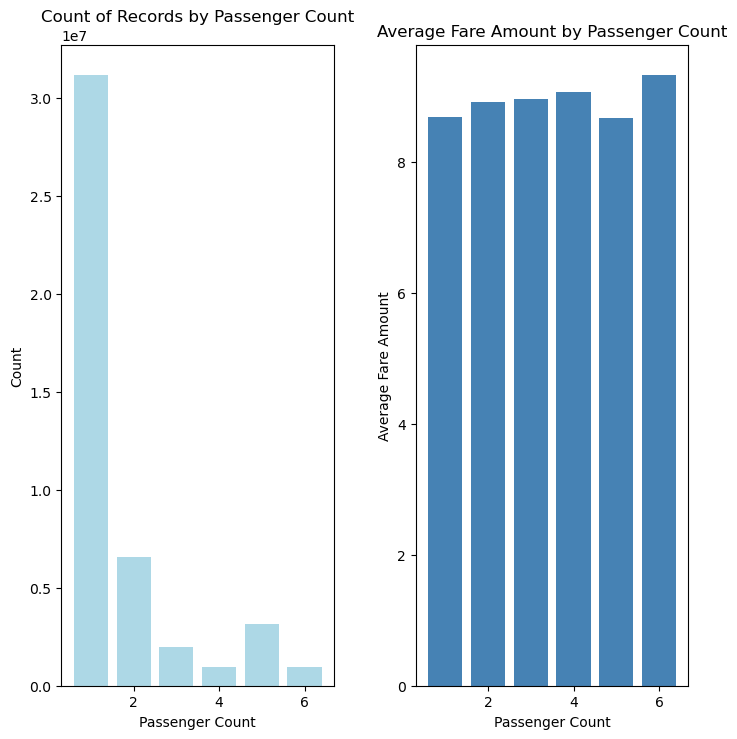


The visualizations illustrate the following:
1. The first plot shows the count of records for each passenger count, providing insight into the distribution of passengers per trip.
2. The second plot shows the average fare amount for each passenger count, giving an indication of fare trends based on the number of passengers.


In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
passenger_count_df = df[['passenger_count', 'fare_amount']]

fig, axs = plt.subplots(ncols=2, figsize=(7, 7))
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)
axs[0].bar(passenger_count_df['passenger_count'].value_counts().sort_index().index,
           passenger_count_df['passenger_count'].value_counts().sort_index().values,
           color='lightblue')
axs[0].set_title("Count of Records by Passenger Count")
axs[0].set_xlabel("Passenger Count")
axs[0].set_ylabel("Count")

avg_fare_by_passenger = passenger_count_df.groupby('passenger_count')['fare_amount'].mean().reset_index()
axs[1].bar(avg_fare_by_passenger['passenger_count'], avg_fare_by_passenger['fare_amount'], color='steelblue')
axs[1].set_title("Average Fare Amount by Passenger Count")
axs[1].set_xlabel("Passenger Count")
axs[1].set_ylabel("Average Fare Amount")

plt.show()
print("\nThe visualizations illustrate the following:")
print("1. The first plot shows the count of records for each passenger count, providing insight into the distribution of passengers per trip.")
print("2. The second plot shows the average fare amount for each passenger count, giving an indication of fare trends based on the number of passengers.")

1. Count of Records by Passenger Count : The majority of trips have one passenger, as indicated by the highest bar in the chart. This suggests that most rides are for individual travel.
The number of trips decreases as the passenger count increases, with fewer trips involving larger groups (e.g., 3 or more passengers).

2. Average Fare Amount by Passenger Count (Right Chart): The average fare amount is relatively consistent for most passenger counts, with slight variations.
There is a noticeable increase in the average fare for trips with higher passenger counts (e.g., 5 or 6 passengers), possibly due to longer or more premium trips.
The lowest average fare is for trips with one passenger, which aligns with the idea that these may often be shorter or more economical trips.

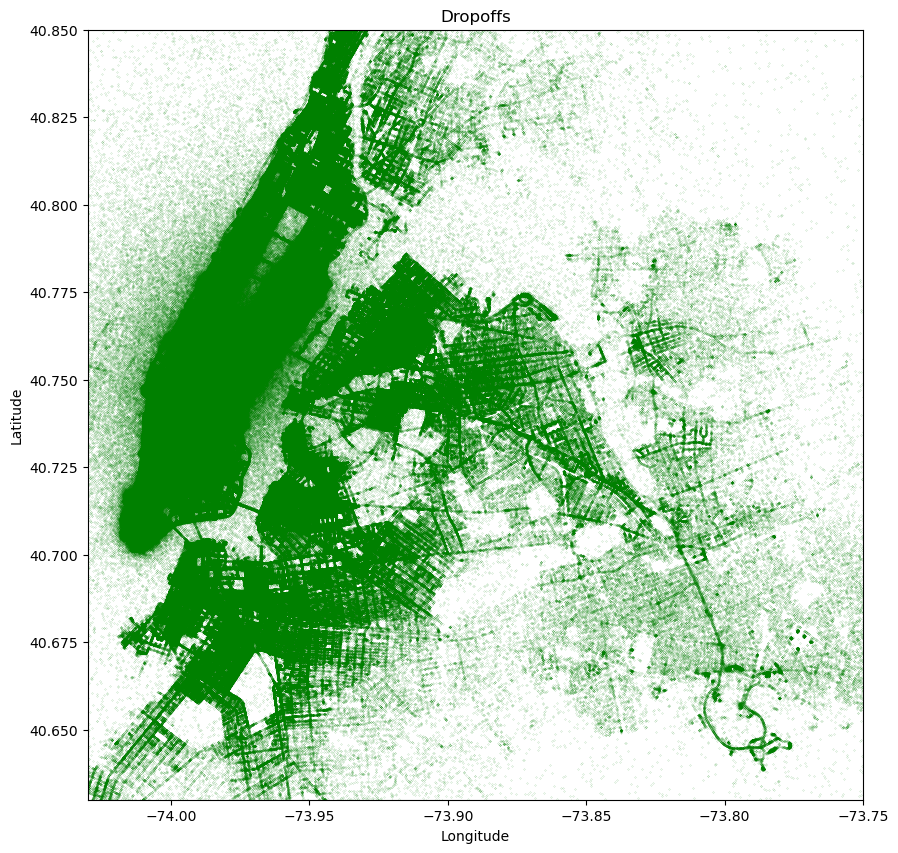

This plot displays the scatter plot of dropoff locations within the defined city borders.


In [13]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

plt.figure(figsize=(10, 10))
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], color='green', s=0.02, alpha=0.6)
plt.title("Dropoffs")
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

print("This plot displays the scatter plot of dropoff locations within the defined city borders.")

The scatter plots of drop-off locations provide the following insights:

1. Concentration of Drop-offs : The densest areas of drop-offs are located in Manhattan, as shown by the high concentration of points. This is expected since Manhattan is a major business and residential area with high taxi activity.
Drop-offs are heavily concentrated along main roads and popular regions, indicating common destinations like business districts, residential areas, and tourist spots.

2. Spatial Distribution : The drop-off locations are well spread throughout New York City, with significant activity in the surrounding boroughs such as Brooklyn and parts of Queens.
There is a noticeable spread into areas with major transport hubs and routes, showing that drop-offs likely align with travel between popular locations.

3. Edge of City Boundaries : The boundaries of taxi drop-offs align with the limits of New York City, indicating that the data captures urban travel effectively. Less dense points in outlying areas may indicate drop-offs in more suburban or less frequently traveled places.

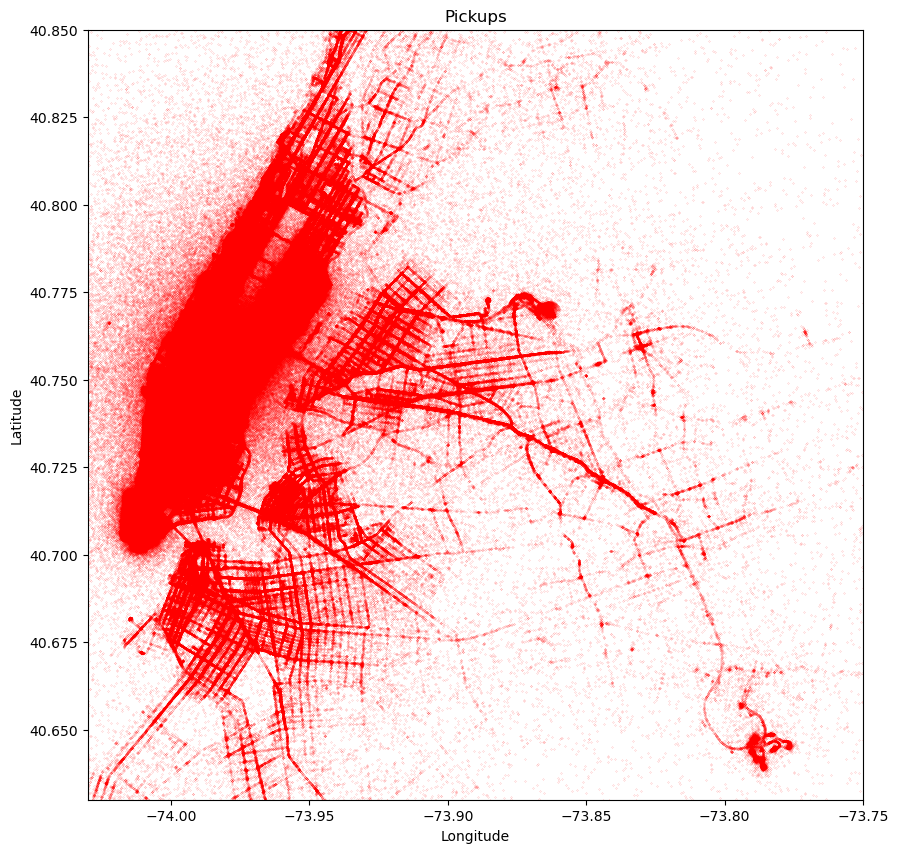


The plot visualizes the distribution of pickup locations within the specified city borders. The red scatter points indicate where pickups occurred, allowing for analysis of geographic density and activity trends within the defined area.


In [14]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

plt.figure(figsize=(10, 10))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], color='red', s=0.02, alpha=0.6)
plt.title("Pickups")
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

print("\nThe plot visualizes the distribution of pickup locations within the specified city borders. The red scatter points indicate where pickups occurred, allowing for analysis of geographic density and activity trends within the defined area.")

The scatter plots of pickup locations reveal the following insights:

1. Concentration of Pickups : The densest pickup locations are in Manhattan, shown by the highest concentration of red points. This aligns with the drop-off patterns and indicates that Manhattan is a key area for taxi services, likely due to its high population density and commercial activity.
The pickup activity follows the city's main roads and popular areas, similar to the drop-off patterns, showing major routes and hubs of movement.

2. Distribution in Other Boroughs : There are notable pickup clusters in other boroughs, such as Brooklyn and Queens, suggesting significant taxi use in these areas as well.
Pickup activity is particularly visible along major roads and transport hubs, implying high demand in well-connected regions.

3. Edge Distribution : The pickups largely stay within New York City's boundaries, with some points extending to peripheral areas, possibly indicating trips originating from less central locations or nearby cities.
The plot suggests fewer pickups in more suburban or rural areas outside the core of New York City.

Comparison between original and preprocessed csvs

In [15]:
original_zip_file_path = 'train.csv.zip'
original_csv_file_name = 'train.csv'

# Read the original CSV file from the zip archive
with zipfile.ZipFile(original_zip_file_path) as z:
    with z.open(original_csv_file_name) as f:
        df_original = pd.read_csv(f, parse_dates=['pickup_datetime'])

In [16]:
# Define the Haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + \
        np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Calculate trip distance
df_original['trip_distance_km'] = df_original.apply(
    lambda row: haversine(
        row['pickup_latitude'],
        row['pickup_longitude'],
        row['dropoff_latitude'],
        row['dropoff_longitude']),
    axis=1
)

# Calculate fare per kilometer
df_original['fare_per_km'] = df_original['fare_amount'] / df_original['trip_distance_km']


/mnt/drive/home/pragyas/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


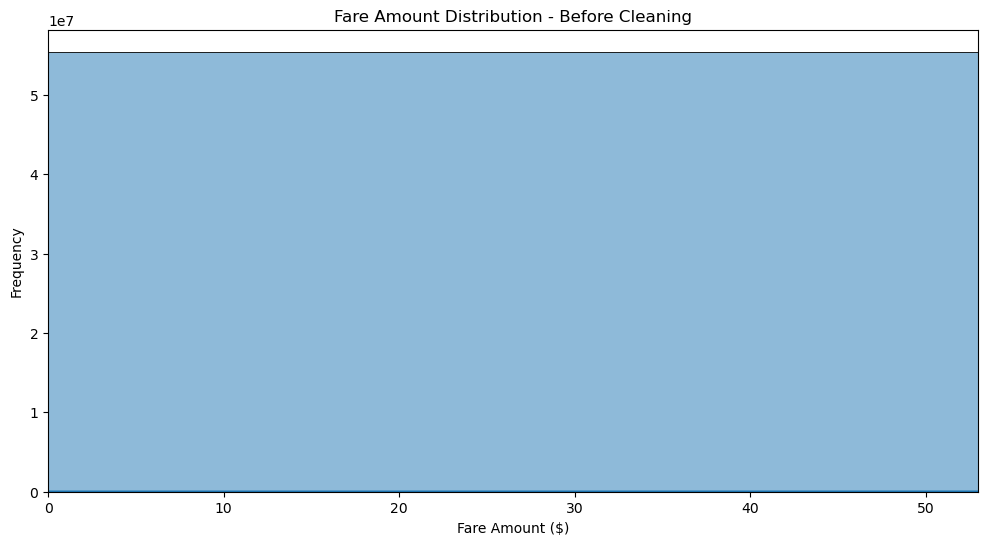

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(df_original['fare_amount'], bins=100, kde=True)
plt.title('Fare Amount Distribution - Before Cleaning')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.xlim(0, df_original['fare_amount'].quantile(0.99))
plt.show()

/mnt/drive/home/pragyas/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


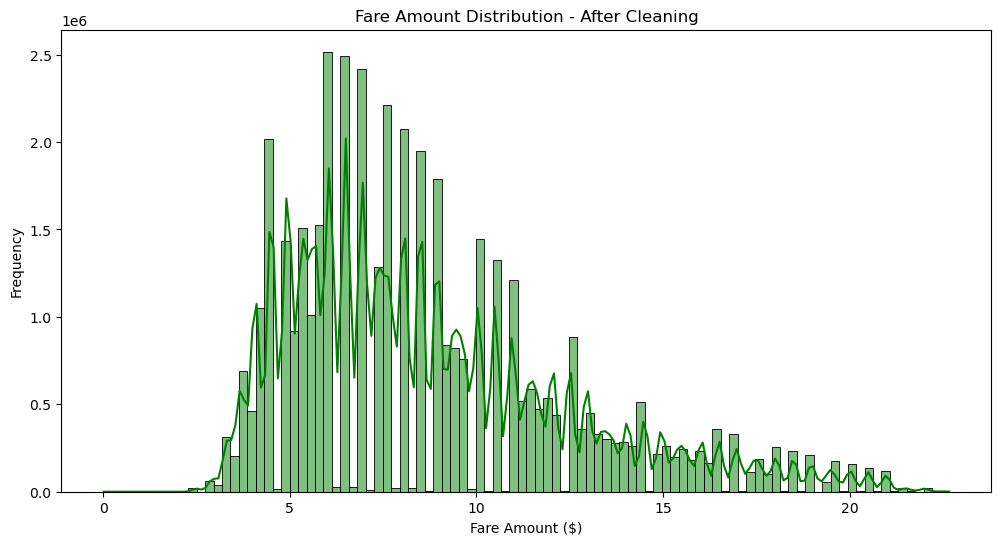

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['fare_amount'], bins=100, kde=True, color='green')
plt.title('Fare Amount Distribution - After Cleaning')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

/mnt/drive/home/pragyas/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


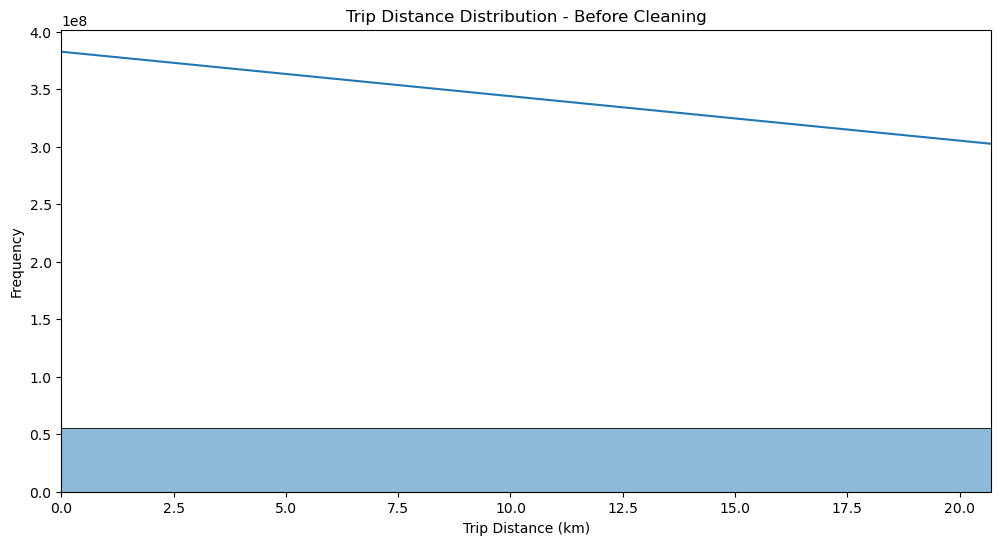

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df_original['trip_distance_km'], bins=100, kde=True)
plt.title('Trip Distance Distribution - Before Cleaning')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Frequency')
plt.xlim(0, df_original['trip_distance_km'].quantile(0.99))
plt.show()

/mnt/drive/home/pragyas/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


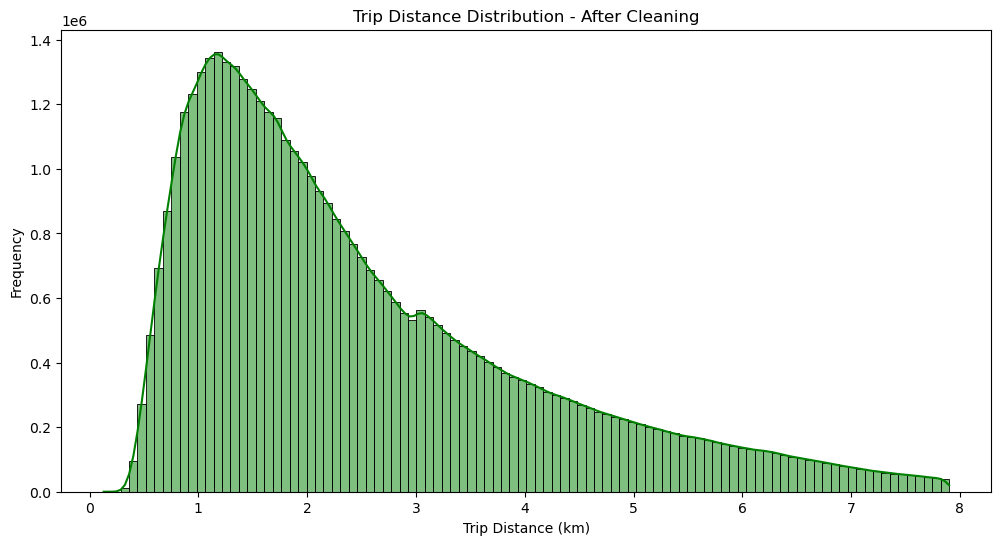

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['trip_distance_km'], bins=100, kde=True, color='green')
plt.title('Trip Distance Distribution - After Cleaning')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Frequency')
plt.show()

/mnt/drive/home/pragyas/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


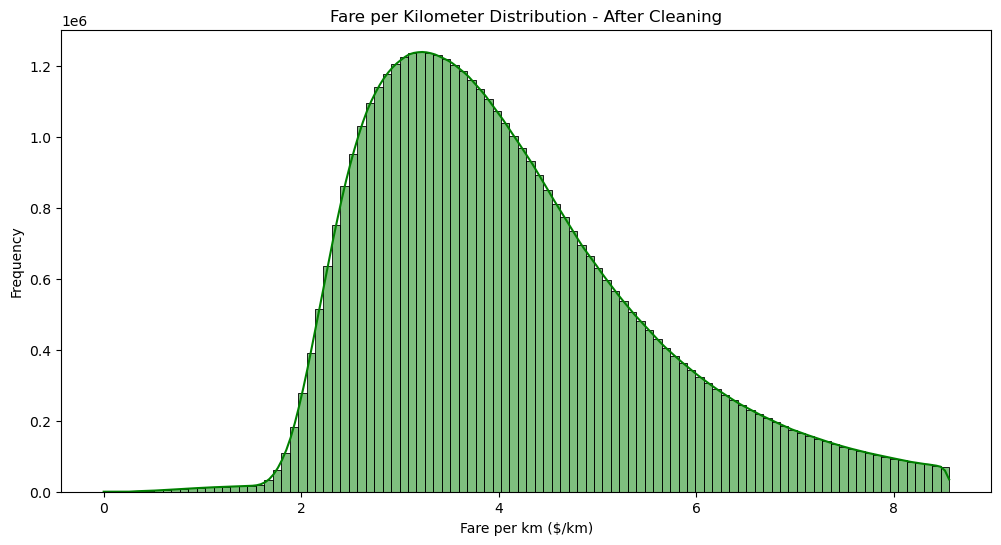

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['fare_per_km'], bins=100, kde=True, color='green')
plt.title('Fare per Kilometer Distribution - After Cleaning')
plt.xlabel('Fare per km ($/km)')
plt.ylabel('Frequency')
plt.show()

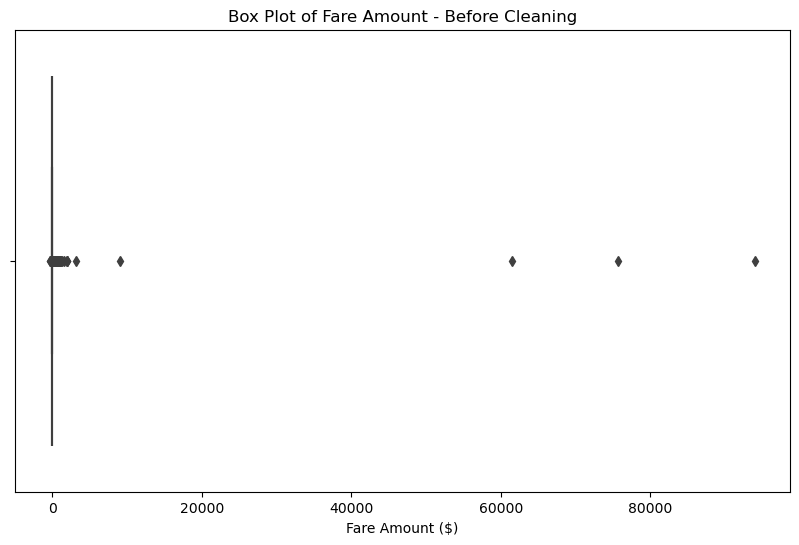

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_original['fare_amount'])
plt.title('Box Plot of Fare Amount - Before Cleaning')
plt.xlabel('Fare Amount ($)')
plt.show()

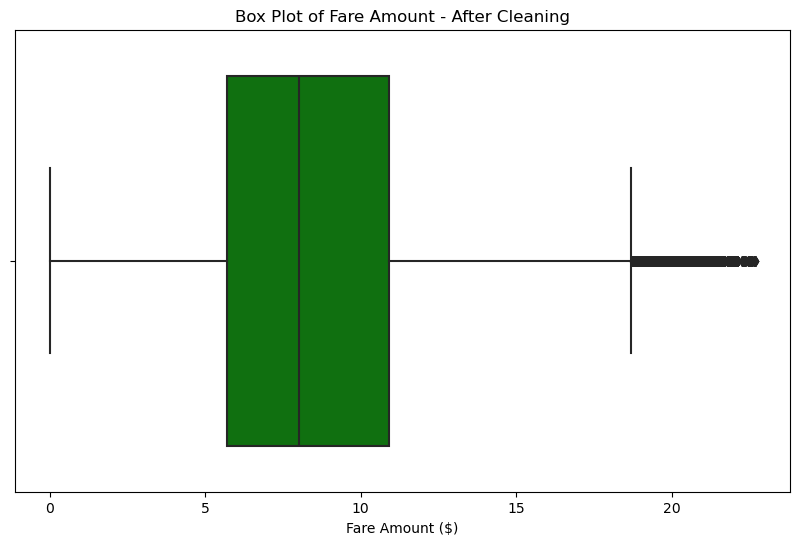

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['fare_amount'], color='green')
plt.title('Box Plot of Fare Amount - After Cleaning')
plt.xlabel('Fare Amount ($)')
plt.show()

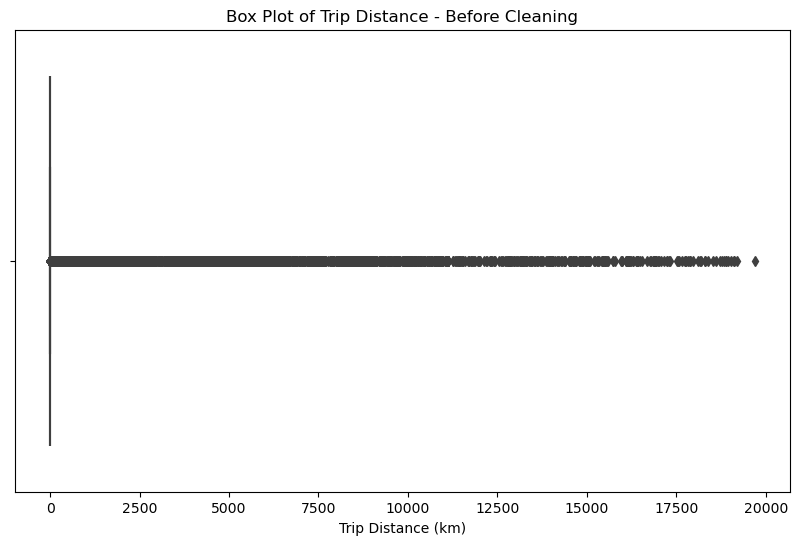

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_original['trip_distance_km'])
plt.title('Box Plot of Trip Distance - Before Cleaning')
plt.xlabel('Trip Distance (km)')
plt.show()

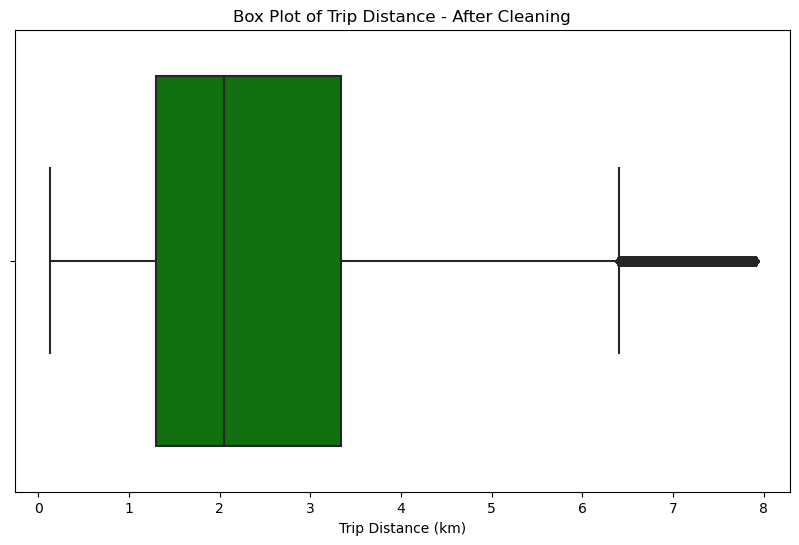

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['trip_distance_km'], color='green')
plt.title('Box Plot of Trip Distance - After Cleaning')
plt.xlabel('Trip Distance (km)')
plt.show()

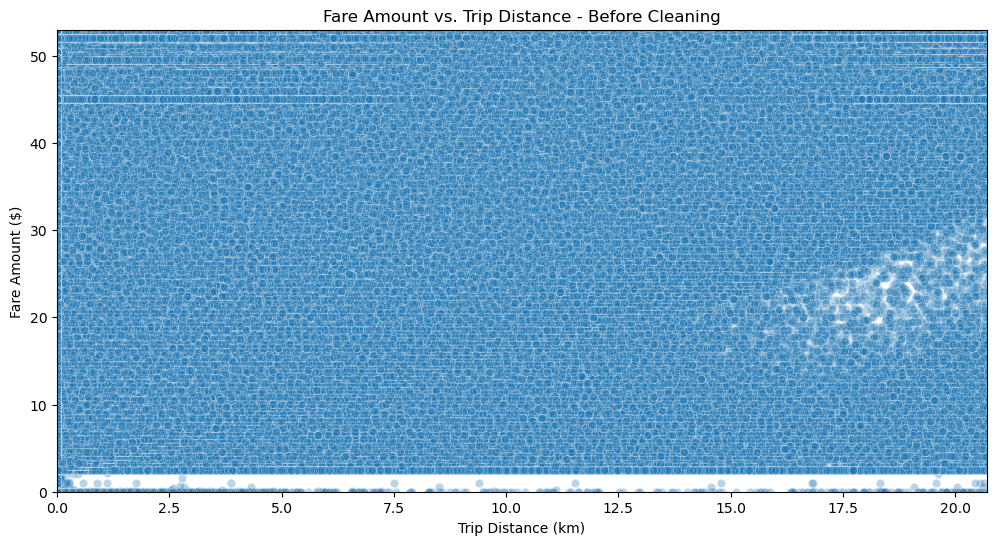

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance_km', y='fare_amount', data=df_original, alpha=0.3)
plt.title('Fare Amount vs. Trip Distance - Before Cleaning')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.xlim(0, df_original['trip_distance_km'].quantile(0.99))
plt.ylim(0, df_original['fare_amount'].quantile(0.99))
plt.show()

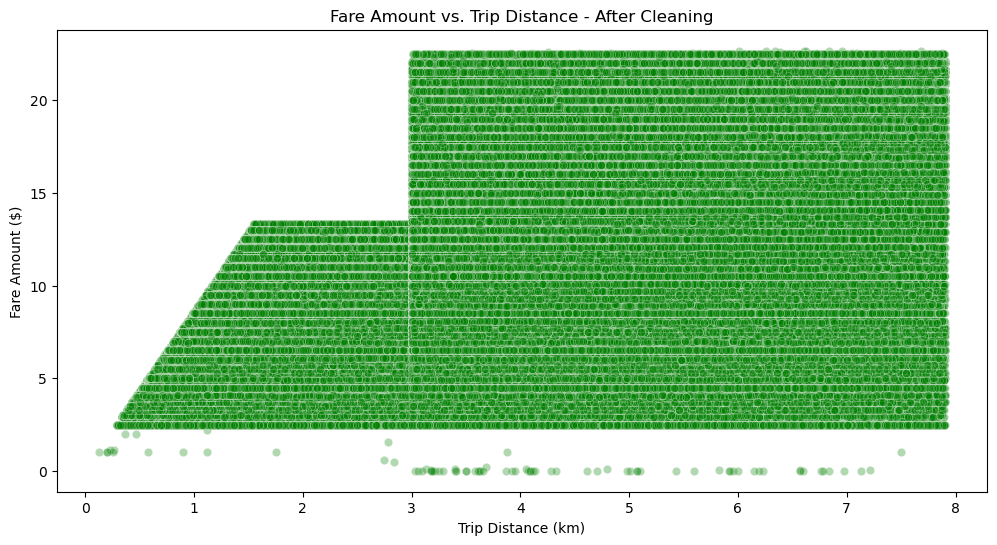

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance_km', y='fare_amount', data=df_cleaned, alpha=0.3, color='green')
plt.title('Fare Amount vs. Trip Distance - After Cleaning')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.show()

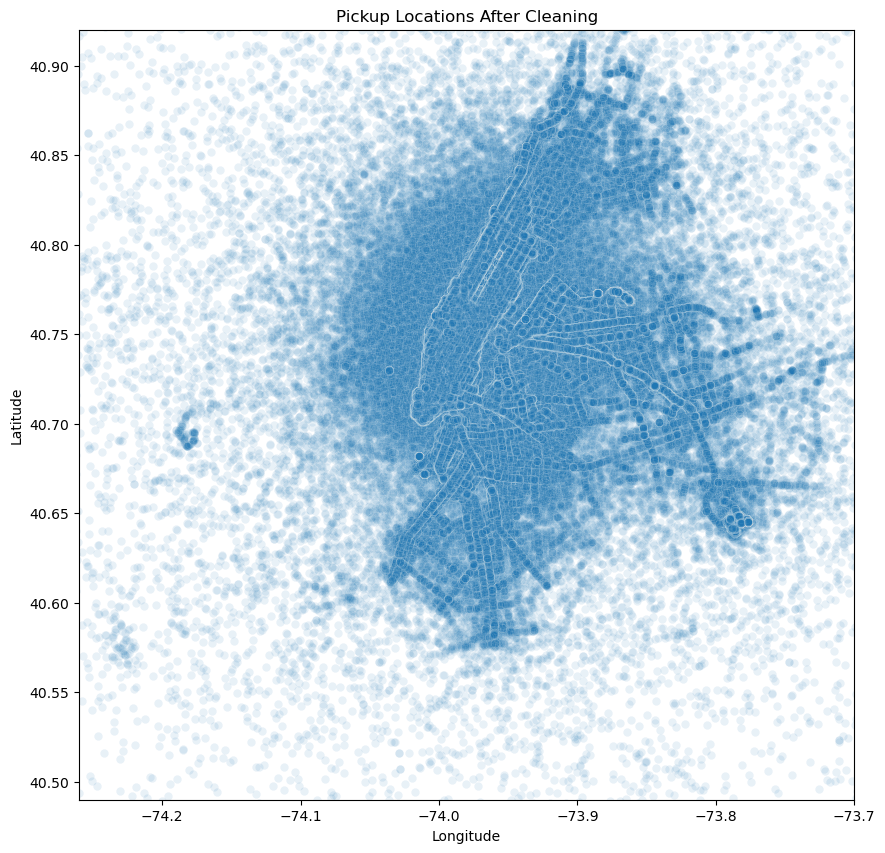

In [28]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df_cleaned, alpha=0.1)
plt.title('Pickup Locations After Cleaning')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-74.26, -73.70)
plt.ylim(40.49, 40.92)
plt.show()

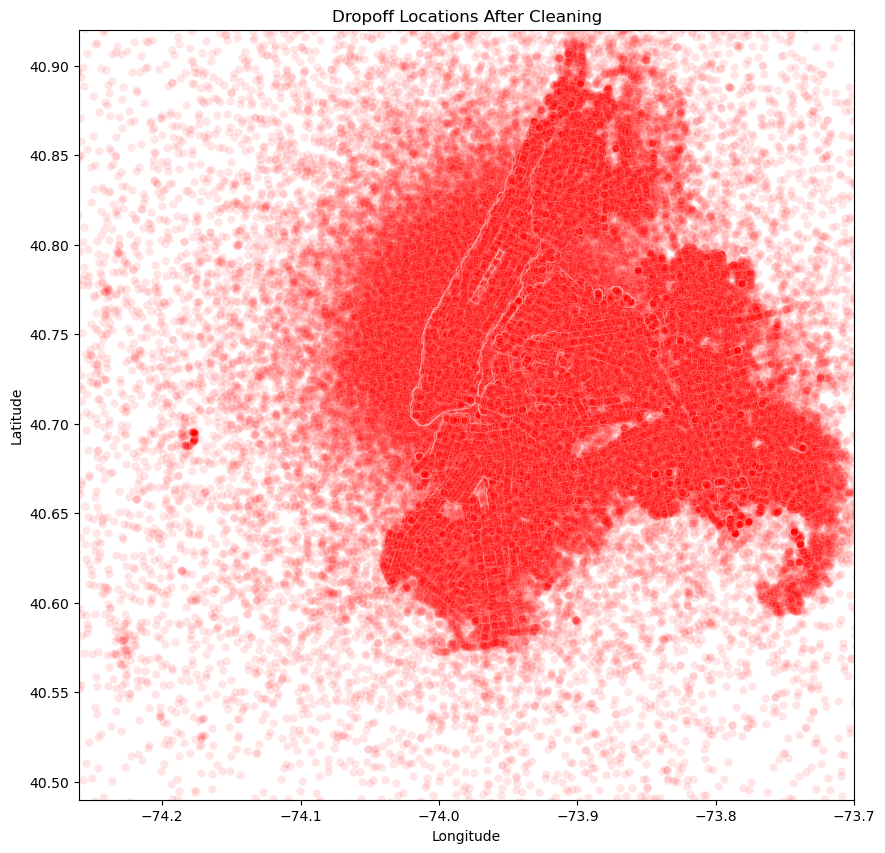

In [29]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df_cleaned, alpha=0.1, color='red')
plt.title('Dropoff Locations After Cleaning')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-74.26, -73.70)
plt.ylim(40.49, 40.92)
plt.show()

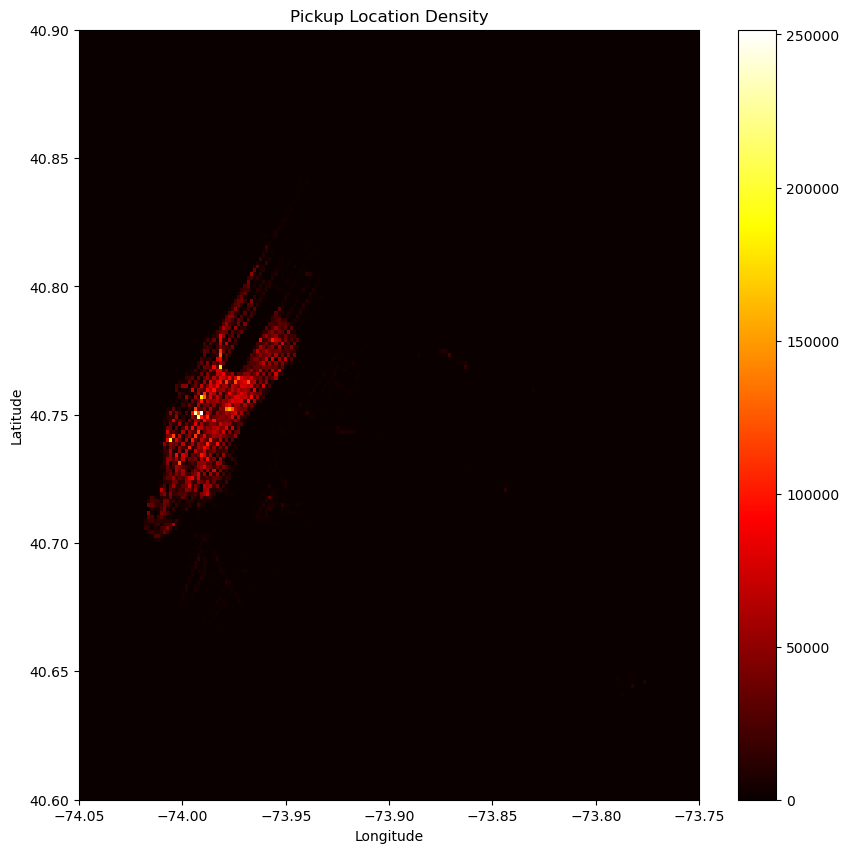

In [30]:
plt.figure(figsize=(10, 10))
plt.hist2d(df_cleaned['pickup_longitude'], df_cleaned['pickup_latitude'], bins=200, cmap='hot', range=[[-74.05, -73.75], [40.60, 40.90]])
plt.colorbar()
plt.title('Pickup Location Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

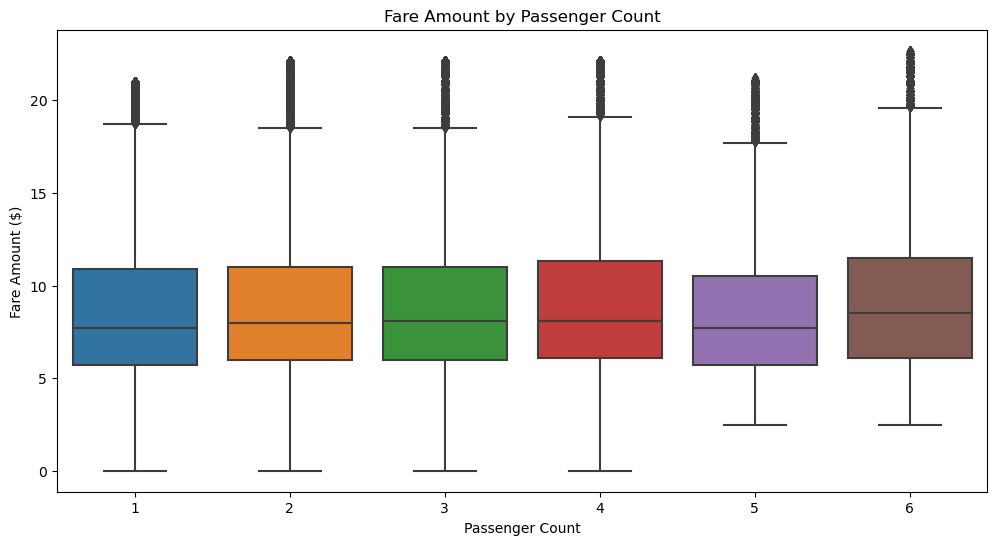

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df_cleaned)
plt.title('Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

/tmp/ipykernel_187946/2560054363.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_cleaned['fare_amount'].resample('M').mean().plot()


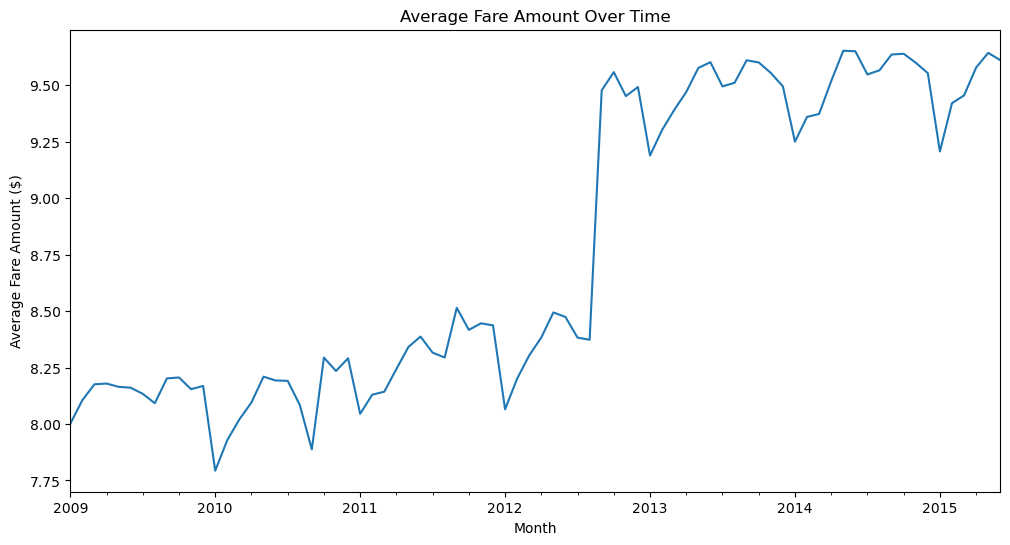

In [32]:
# Ensure 'pickup_datetime' is set as index
if df_cleaned.index.name != 'pickup_datetime':
    df_cleaned.set_index('pickup_datetime', inplace=True)

# Resample to monthly frequency and plot
plt.figure(figsize=(12, 6))
df_cleaned['fare_amount'].resample('M').mean().plot()
plt.title('Average Fare Amount Over Time')
plt.xlabel('Month')
plt.ylabel('Average Fare Amount ($)')
plt.show()

In [33]:
data = df

categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
non_categorical_columns = data.select_dtypes(exclude=['object', 'category']).columns.tolist()
print("Categorical Variables:")
print(categorical_columns)
print("\nNon-Categorical Variables:")
print(non_categorical_columns)

Categorical Variables:
['key', 'pickup_dayofweek', 'distance_band']

Non-Categorical Variables:
['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'trip_distance_km', 'pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour', 'is_weekend', 'fare_per_km']


In [34]:
descriptive_stats = pd.DataFrame({
    'mean': data[non_categorical_columns].mean(),
    'median': data[non_categorical_columns].median(),
    'std': data[non_categorical_columns].std(),
    'min': data[non_categorical_columns].min(),
    'max': data[non_categorical_columns].max(),
    'range': data[non_categorical_columns].max() - data[non_categorical_columns].min()
})

print("\nDescriptive Statistics of Non-Categorical Columns:")
print(descriptive_stats[['mean', 'median', 'std', 'min', 'max', 'range']])


Descriptive Statistics of Non-Categorical Columns:
                          mean       median       std          min  \
fare_amount           8.743927     8.000000  3.810193     0.010000   
pickup_longitude    -73.940202   -73.982552  2.144797  -115.166318   
pickup_latitude      40.712282    40.753207  2.132949   -74.017987   
dropoff_longitude   -73.938628   -73.981467  2.144800  -115.166987   
dropoff_latitude     40.712500    40.753867  2.132936   -74.019515   
passenger_count       1.686167     1.000000  1.302071     1.000000   
trip_distance_km      2.508261     2.044688  1.589069     0.129617   
pickup_year        2011.681071  2012.000000  1.857544  2009.000000   
pickup_month          6.232923     6.000000  3.438382     1.000000   
pickup_day           15.710825    16.000000  8.690444     1.000000   
pickup_hour          13.586355    14.000000  6.526086     0.000000   
is_weekend            0.286242     0.000000  0.452004     0.000000   
fare_per_km           4.096135     3.8

In [35]:
categorical_columns = [
    'pickup_year', 'pickup_month', 'pickup_day', 'pickup_dayofweek',
    'pickup_hour', 'is_weekend', 'distance_band'
]

categorical_columns = list(set(data.select_dtypes(include=['object', 'category']).columns.tolist() +
                               [col for col in categorical_columns if col in data.columns]))
non_categorical_columns = [
    col for col in data.select_dtypes(exclude=['object', 'category']).columns.tolist()
    if col not in categorical_columns
]

print("Categorical Variables:")
print(categorical_columns)
print("\nNon-Categorical Variables:")
print(non_categorical_columns)


Categorical Variables:
['key', 'pickup_month', 'is_weekend', 'pickup_day', 'pickup_hour', 'pickup_dayofweek', 'distance_band', 'pickup_year']

Non-Categorical Variables:
['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'trip_distance_km', 'fare_per_km']


In [36]:
x_fare_per_km = data['fare_per_km']
y_trip_distance = data['trip_distance_km']
y_fare_amount = data['fare_amount']
y_passenger_count = data['passenger_count']

filtered_data = data[data['passenger_count'] != 0]
x_fare_per_km_filtered = filtered_data['fare_per_km']
y_fare_amount_filtered = filtered_data['fare_amount']
y_passenger_count_filtered = filtered_data['passenger_count']

#Pearson's correlation for fare_per_km and trip_distance_km
mean_x_fare_per_km = x_fare_per_km.mean()
mean_y_trip_distance = y_trip_distance.mean()
numerator1 = ((x_fare_per_km - mean_x_fare_per_km) * (y_trip_distance - mean_y_trip_distance)).sum()
denominator1 = ((x_fare_per_km - mean_x_fare_per_km).pow(2).sum() * (y_trip_distance - mean_y_trip_distance).pow(2).sum()) ** 0.5
pearson_coefficient1 = numerator1 / denominator1
print("Pearson's correlation coefficient (fare_per_km vs trip_distance_km):", pearson_coefficient1)

#Pearson's correlation for trip_distance_km and fare_amount
mean_y_fare_amount = y_fare_amount.mean()
numerator2 = ((y_trip_distance - mean_y_trip_distance) * (y_fare_amount - mean_y_fare_amount)).sum()
denominator2 = ((y_trip_distance - mean_y_trip_distance).pow(2).sum() * (y_fare_amount - mean_y_fare_amount).pow(2).sum()) ** 0.5
pearson_coefficient2 = numerator2 / denominator2
print("Pearson's correlation coefficient (trip_distance_km vs fare_amount):", pearson_coefficient2)

#Pearson's correlation for passenger_count and fare_amount (filtered)
mean_y_fare_amount_filtered = y_fare_amount_filtered.mean()
mean_y_passenger_count_filtered = y_passenger_count_filtered.mean()
numerator3 = ((y_passenger_count_filtered - mean_y_passenger_count_filtered) * (y_fare_amount_filtered - mean_y_fare_amount_filtered)).sum()
denominator3 = ((y_passenger_count_filtered - mean_y_passenger_count_filtered).pow(2).sum() * (y_fare_amount_filtered - mean_y_fare_amount_filtered).pow(2).sum()) ** 0.5
pearson_coefficient3 = numerator3 / denominator3
print("Pearson's correlation coefficient (passenger_count vs fare_amount):", pearson_coefficient3)

#Pearson's correlation for passenger_count and fare_per_km (filtered)
mean_x_fare_per_km_filtered = x_fare_per_km_filtered.mean()
numerator4 = ((y_passenger_count_filtered - mean_y_passenger_count_filtered) * (x_fare_per_km_filtered - mean_x_fare_per_km_filtered)).sum()
denominator4 = ((y_passenger_count_filtered - mean_y_passenger_count_filtered).pow(2).sum() * (x_fare_per_km_filtered - mean_x_fare_per_km_filtered).pow(2).sum()) ** 0.5
pearson_coefficient4 = numerator4 / denominator4
print("Pearson's correlation coefficient (passenger_count vs fare_per_km):", pearson_coefficient4)

Pearson's correlation coefficient (fare_per_km vs trip_distance_km): -0.6880901769602191
Pearson's correlation coefficient (trip_distance_km vs fare_amount): 0.8573513566385136
Pearson's correlation coefficient (passenger_count vs fare_amount): 0.02028013711733594
Pearson's correlation coefficient (passenger_count vs fare_per_km): 0.00572837990367872


ANALYSIS OF CALCULATED PEARSON'S COEFFICIENTS

<Figure size 1200x600 with 0 Axes>

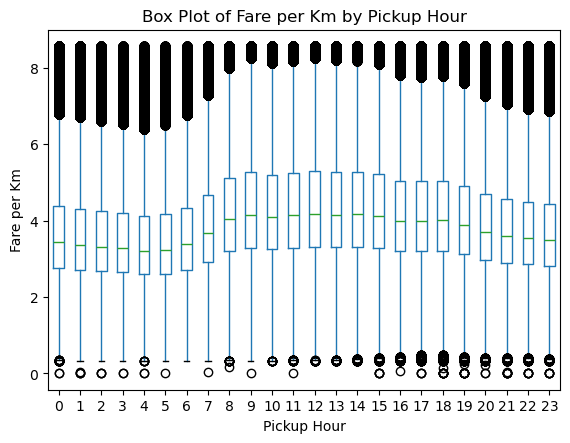

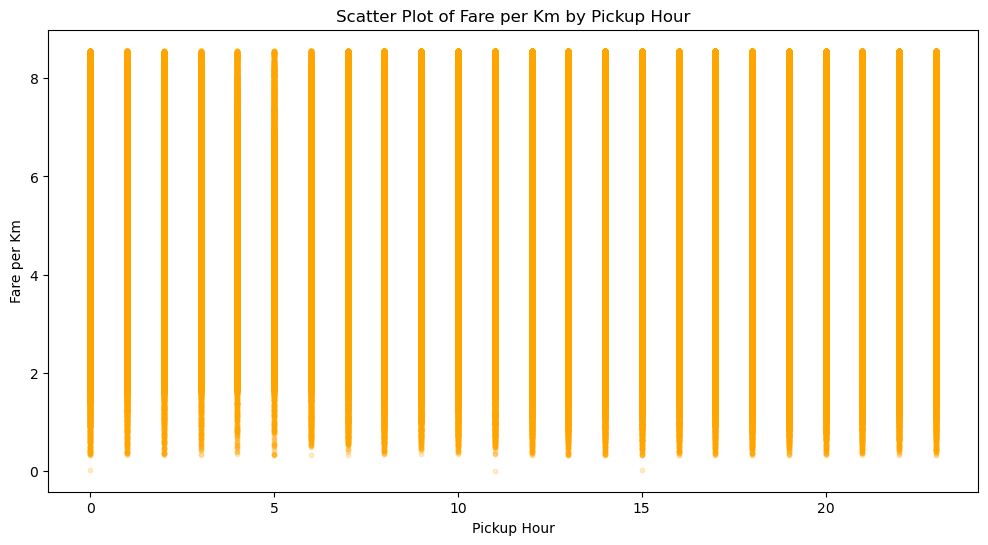

In [37]:
import matplotlib.pyplot as plt
import numpy as np
sampled_data = data.sample(frac=0.1, random_state=1)

plt.figure(figsize=(12, 6))
data.boxplot(column='fare_per_km', by='pickup_hour', grid=False)
plt.title('Box Plot of Fare per Km by Pickup Hour')
plt.suptitle("")
plt.xlabel('Pickup Hour')
plt.ylabel('Fare per Km')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(sampled_data['pickup_hour'], sampled_data['fare_per_km'], color='orange', alpha=0.2, s=10)
plt.title('Scatter Plot of Fare per Km by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Fare per Km')
plt.show()

<Figure size 1200x600 with 0 Axes>

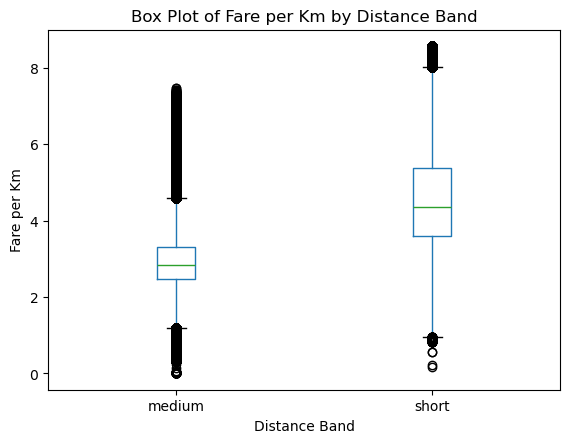

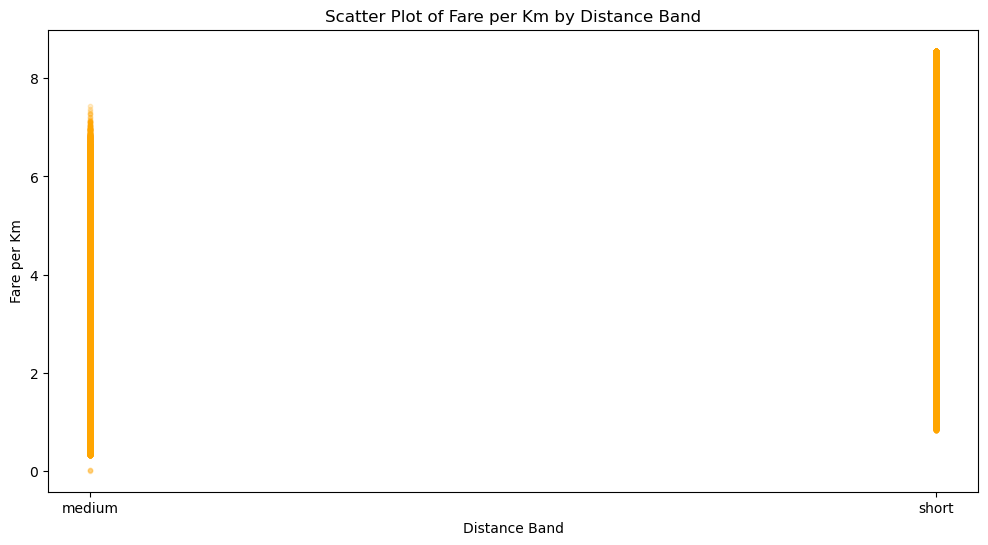

In [38]:
plt.figure(figsize=(12, 6))
data.boxplot(column='fare_per_km', by='distance_band', grid=False)
plt.title('Box Plot of Fare per Km by Distance Band')
plt.suptitle("")
plt.xlabel('Distance Band')
plt.ylabel('Fare per Km')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(sampled_data['distance_band'], sampled_data['fare_per_km'], color='orange', alpha=0.2, s=10)
plt.title('Scatter Plot of Fare per Km by Distance Band')
plt.xlabel('Distance Band')
plt.ylabel('Fare per Km')
plt.show()

<Figure size 1200x600 with 0 Axes>

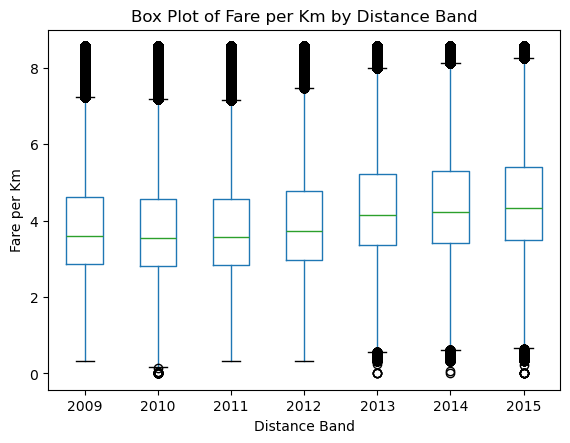

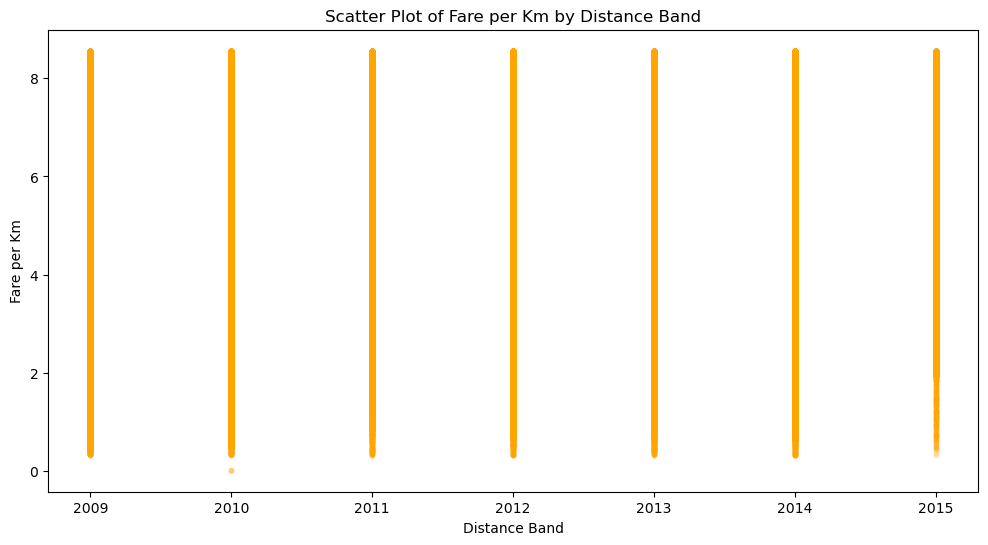

In [39]:
plt.figure(figsize=(12, 6))
data.boxplot(column='fare_per_km', by='pickup_year', grid=False)
plt.title('Box Plot of Fare per Km by Distance Band')
plt.suptitle("")
plt.xlabel('Distance Band')
plt.ylabel('Fare per Km')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(sampled_data['pickup_year'], sampled_data['fare_per_km'], color='orange', alpha=0.2, s=10)
plt.title('Scatter Plot of Fare per Km by Distance Band')
plt.xlabel('Distance Band')
plt.ylabel('Fare per Km')
plt.show()

<Figure size 1200x600 with 0 Axes>

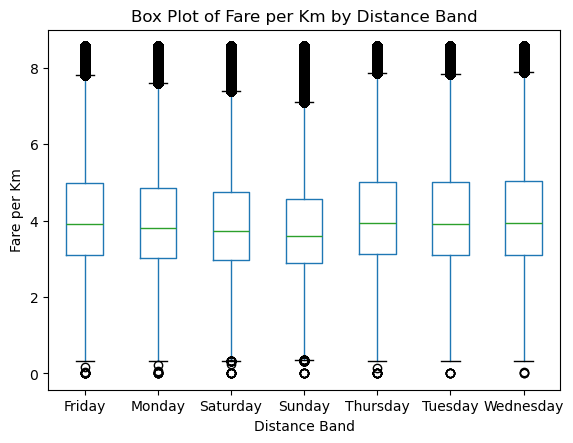

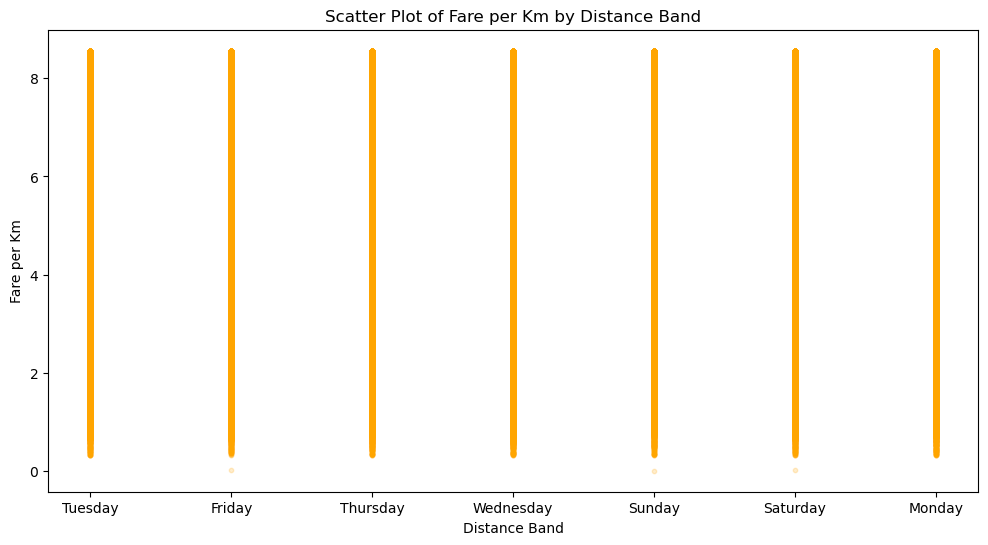

In [40]:
plt.figure(figsize=(12, 6))
data.boxplot(column='fare_per_km', by='pickup_dayofweek', grid=False)
plt.title('Box Plot of Fare per Km by Distance Band')
plt.suptitle("")
plt.xlabel('Distance Band')
plt.ylabel('Fare per Km')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(sampled_data['pickup_dayofweek'], sampled_data['fare_per_km'], color='orange', alpha=0.2, s=10)
plt.title('Scatter Plot of Fare per Km by Distance Band')
plt.xlabel('Distance Band')
plt.ylabel('Fare per Km')
plt.show()

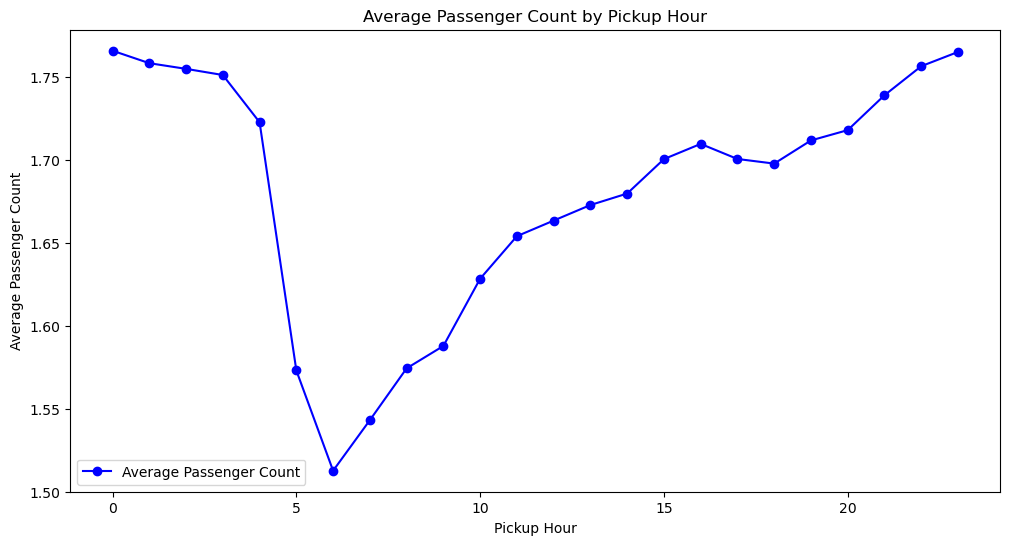

In [ ]:
average_passenger_count = data.groupby('pickup_hour')['passenger_count'].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_passenger_count.index, average_passenger_count.values, marker='o', color='b', label='Average Passenger Count')
plt.title('Average Passenger Count by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Passenger Count')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

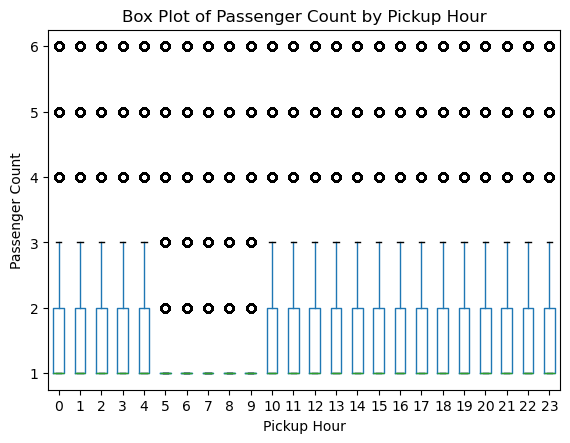

In [42]:
# Box plot of passenger count by pickup hour
plt.figure(figsize=(12, 6))
data.boxplot(column='passenger_count', by='pickup_hour', grid=False)
plt.title('Box Plot of Passenger Count by Pickup Hour')
plt.suptitle("")  # Removes the automatic 'Boxplot grouped by pickup_hour' title
plt.xlabel('Pickup Hour')
plt.ylabel('Passenger Count')
plt.show()

In [43]:
import pandas as pd

# Group by 'distance_band' and calculate the minimum and maximum 'trip_distance_km' for each band
distance_band_ranges = data.groupby('distance_band')['trip_distance_km'].agg(['min', 'max']).reset_index()

# Display the result
print(distance_band_ranges)

  distance_band       min       max
0        medium  3.000000  7.901124
1         short  0.129617  3.000000
